<a href="https://colab.research.google.com/github/rishu-web/BrainTumourDetection/blob/main/Brain_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
!wget https://www.dropbox.com/s/dtw18saps0231yn/BrainTumorData.zip?dl=0
!unzip /content/BrainTumorData.zip?dl=0

--2021-11-13 19:19:25--  https://www.dropbox.com/s/dtw18saps0231yn/BrainTumorData.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dtw18saps0231yn/BrainTumorData.zip [following]
--2021-11-13 19:19:25--  https://www.dropbox.com/s/raw/dtw18saps0231yn/BrainTumorData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca846f4ee9975c2680547e580a1.dl.dropboxusercontent.com/cd/0/inline/BZ4z4KB2Tiv4pO5xkTJ1VW1XxV7RCD24XXbJJZCbDGRFgdNRyVq0-cBTd2tM3YwKuD8Rn1pnEJaXDCVKAIHM5_QkY3ZGXVXlvsKA74lpjKS4IgdA3uSrPJ_4mvBEPBDcvPAZhK144f3F4w7Kaao-XfPm/file# [following]
--2021-11-13 19:19:25--  https://uca846f4ee9975c2680547e580a1.dl.dropboxusercontent.com/cd/0/inline/BZ4z4KB2Tiv4pO5xkTJ1VW1XxV7RCD24XXbJJZCbDGRFgdNRyVq0-cBTd2tM3YwKuD8

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [11]:
import tensorflow as tf
import keras

In [12]:
data=r"/content/BrainTumorData/Brain Tumor Data Set"

In [13]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(data,validation_split=.2,seed=123,subset='training',batch_size=32,image_size=(100,100))

Found 4514 files belonging to 2 classes.
Using 3612 files for training.


In [14]:
val_data=tf.keras.utils.image_dataset_from_directory(data,validation_split=.2,seed=123,subset='validation',batch_size=32,image_size=(100,100))

Found 4514 files belonging to 2 classes.
Using 902 files for validation.


In [15]:
val_batches = tf.data.experimental.cardinality(val_data)
test_data = val_data.take(val_batches//5)
val_data = val_data.skip(val_batches//5)

In [16]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [17]:
#model=keras.Sequential()
#model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)))
#model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
#model.add(MaxPool2D(pool_size=(2,2)))

#model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
#model.add(MaxPool2D(pool_size=(2,2)))

#model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
#model.add(MaxPool2D(pool_size=(2,2)))

#model.add(Dropout(rate=0.25))

#model.add(Flatten())
#model.add(Dense(units=64, activation='relu'))
#model.add(Dropout(rate=0.25))

#model.summary()

In [18]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=16, activation='relu', kernel_size=(3,3), input_shape=(100,100,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(filters=32, activation='relu', kernel_size=
                        (3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(filters=64, activation='relu', kernel_size=(3,3)),
    keras.layers.MaxPooling2D(2,2),
    
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(2, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 64)       0

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, validation_data=val_data, epochs=10, verbose=1, batch_size=32)
#model.fit(train_data,validation_data=val_data,epochs=15,verbose=1,batch_size=32)

Epoch 1/10
113/113 [==============================] - 37s 314ms/step - loss: 3.0021 - accuracy: 0.7137 - val_loss: 0.4884 - val_accuracy: 0.7520
Epoch 2/10
113/113 [==============================] - 35s 310ms/step - loss: 0.3355 - accuracy: 0.8585 - val_loss: 0.3407 - val_accuracy: 0.8477
Epoch 3/10
113/113 [==============================] - 35s 311ms/step - loss: 0.2502 - accuracy: 0.8995 - val_loss: 0.2571 - val_accuracy: 0.8989
Epoch 4/10
113/113 [==============================] - 35s 311ms/step - loss: 0.1764 - accuracy: 0.9369 - val_loss: 0.1818 - val_accuracy: 0.9313
Epoch 5/10
113/113 [==============================] - 35s 312ms/step - loss: 0.1204 - accuracy: 0.9565 - val_loss: 0.2062 - val_accuracy: 0.9124
Epoch 6/10
113/113 [==============================] - 36s 312ms/step - loss: 0.0970 - accuracy: 0.9651 - val_loss: 0.1371 - val_accuracy: 0.9447
Epoch 7/10
113/113 [==============================] - 35s 312ms/step - loss: 0.0791 - accuracy: 0.9715 - val_loss: 0.1711 - val_ac

In [21]:
model.evaluate(test_data)

5/5 [==============================] - 1s 121ms/step - loss: 0.0542 - accuracy: 0.9812


[0.054173700511455536, 0.981249988079071]

In [22]:
from PIL import Image

99.99806880950928% Confidence This Is Its a Tumor


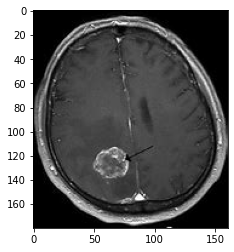

In [26]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'
from matplotlib.pyplot import imshow
img = Image.open(r"/content/braintumour2.jpg")
x = np.array(img.resize((100,100)))
x = x.reshape(1,100,100,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))